In [7]:
import cmocean.cm as cm
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import seaborn as sb
import scipy.io as sio
import xarray as xr

from salishsea_tools import geo_tools, places

%matplotlib inline

In [9]:
sb.set_context('paper', font_scale=2.5)

In [141]:
with nc.Dataset('/ocean/sallen/allen/research/SOG-projects/bloom_work_2018/solar_04mar17.nc') as dataset:
    solar = dataset.variables['solar'][0]

In [3]:
with nc.Dataset('/ocean/sallen/allen/research/SOG-projects/bloom_work_2018/ubcSSaAtmosphereGridV1_0f03_6268_df4b.nc') as dataset:
    lons = dataset.variables['longitude'][:]
    lats = dataset.variables['latitude'][:]

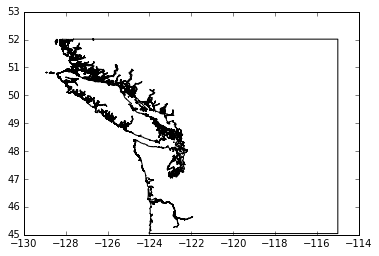

In [14]:
# Pacific Now-West coastline polygons file
coastline_file = '/ocean/rich/more/mmapbase/bcgeo/PNW.mat'
coastline = sio.loadmat(coastline_file)
coast_lat = coastline['ncst'][:, 1]
coast_lon = coastline['ncst'][:, 0]
plt.plot(coast_lon, coast_lat, '-k', rasterized=True, markersize=1)

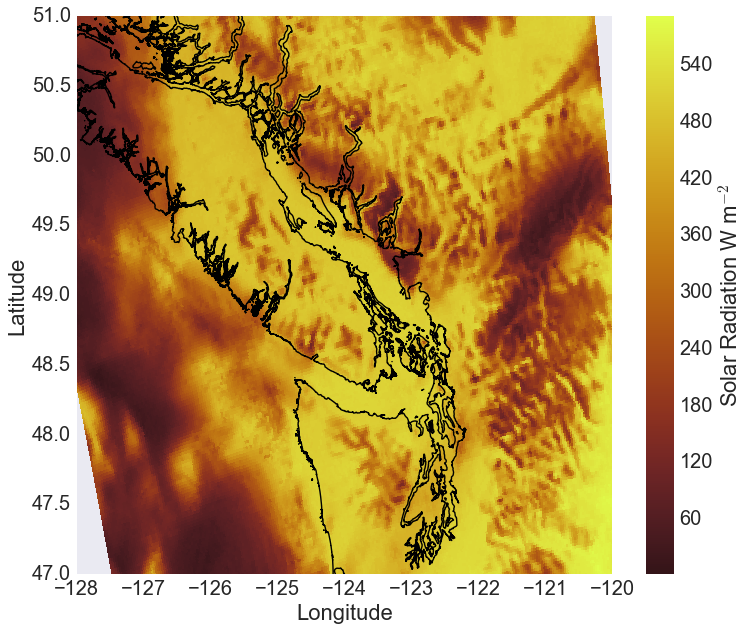

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mesh = ax.pcolormesh(lons - 360., lats, solar, cmap=cm.solar)
cb = fig.colorbar(mesh)
cb.set_label('Solar Radiation W m$^{-2}$')
ax.plot(coast_lon, coast_lat, '-k', rasterized=True, markersize=1)
ax.set_ylim((47, 51))
ax.set_xlim((232 - 360, 240 - 360))
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

In [13]:
S3 = xr.open_dataset('/ocean/sallen/allen/research/SOG-projects/bloom_work_2018/Solar_S3_final.nc')
YVR = xr.open_dataset('/ocean/sallen/allen/research/SOG-projects/bloom_work_2018/Solar_YVR_final.nc')

In [12]:
print(S3.solar.gridY, S3.solar.gridX)

<xarray.DataArray 'gridY' (gridY: 1)>
array([ 345000.])
Coordinates:
  * gridY    (gridY) float64 3.45e+05
Attributes:
    _ChunkSizes:    266
    actual_range:   [ 345000.  345000.]
    long_name:      Y
    standard_name:  y <xarray.DataArray 'gridX' (gridX: 1)>
array([ 360000.])
Coordinates:
  * gridX    (gridX) float64 3.6e+05
Attributes:
    _ChunkSizes:    256
    actual_range:   [ 360000.  360000.]
    long_name:      X
    standard_name:  x


(736392.0, 736393.0)

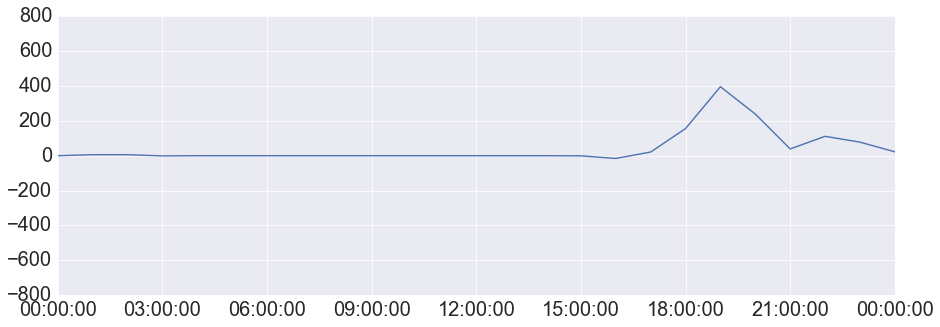

In [173]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(S3.time, S3.solar[:, 0, 0] - YVR.solar[:, 0, 0])
ax.set_xlim((datetime.strptime('2017-03-04', '%Y-%m-%d'), datetime.strptime('2017-03-05', '%Y-%m-%d')))
#plt.plot(YVR)

In [14]:
difference = (S3.solar.sel(gridY=S3.gridY.values[0], gridX=S3.gridX.values[0]) - 
              YVR.solar.sel(gridY=YVR.gridY.values[0], gridX=YVR.gridX.values[0]))
differencecum15.values.shape

NameError: name 'differencecum15' is not defined

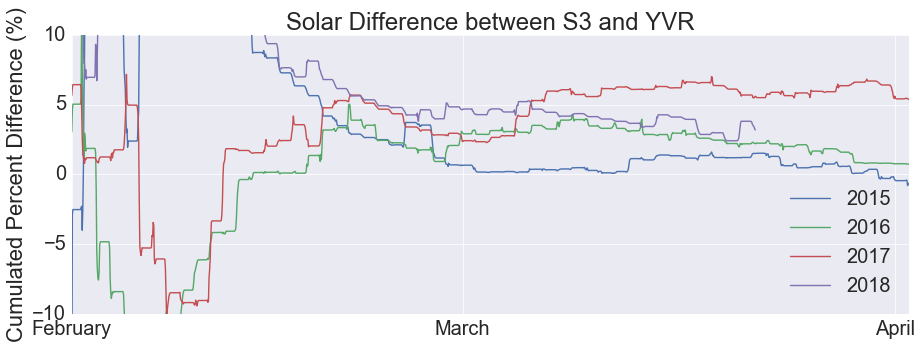

In [16]:
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%B')
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
differencecum15 = difference.sel(time=slice('2015-02-01', '2015-04-01')).cumsum(axis=0)
cum15 = S3.solar.sel(time=slice('2015-02-01', '2015-04-01')).cumsum(axis=0)
percent15 = differencecum15.values[:] / cum15.values[:, 0, 0]
ax.plot(S3.time.sel(time=slice('2015-02-01', '2015-04-01')), percent15*100, label='2015')

differencecum16 = difference.sel(time=slice('2016-02-01', '2016-03-31')).cumsum(axis=0)
cum16 = S3.solar.sel(time=slice('2016-02-01', '2016-03-31')).cumsum(axis=0)
percent16 = differencecum16.values[:] / cum16.values[:, 0, 0]
ax.plot(S3.time.sel(time=slice('2015-02-01', '2015-04-01')), percent16*100, label='2016')

differencecum17 = difference.sel(time=slice('2017-02-01', '2017-04-01')).cumsum(axis=0)
cum17 = S3.solar.sel(time=slice('2017-02-01', '2017-04-01')).cumsum(axis=0)
percent17 = differencecum17.values[:] / cum17.values[:, 0, 0]
ax.plot(S3.time.sel(time=slice('2015-02-01', '2015-04-01')), percent17*100, label='2017')

differencecum18 = difference.sel(time=slice('2018-02-01', '2018-04-01')).cumsum(axis=0)
cum18 = S3.solar.sel(time=slice('2018-02-01', '2018-04-01')).cumsum(axis=0)
percent18 = differencecum18.values[:] / cum18.values[:, 0, 0]
ax.plot(S3.time.sel(time=slice('2015-02-01', '2015-03-21')), percent18*100, label='2018')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.set_ylabel('Cumulated Percent Difference (%)')
ax.set_title('Solar Difference between S3 and YVR')
ax.legend(loc='lower right')
ax.set_ylim((-10, 10));

In [ ]:
plt.plot(pretty.solar[:, 0, 0])

# Finding the Points ##

In [4]:
for station in ['YVR', 'S3']:
    print (station, geo_tools.find_closest_model_point(places.PLACES[station]['lon lat'][0], places.PLACES[station]['lon lat'][1], lons-360, lats,
                                         grid='GEM2.5'))

YVR (139, 155)
S3 (138, 144)


In [8]:
for station in ['YVR', 'S3']:
    print (station, places.PLACES[station]['GEM2.5 grid ji'])
    print (station, np.array(places.PLACES[station]['GEM2.5 grid ji'])*2500.)

YVR (139, 155)
YVR [ 347500.  387500.]
S3 (138, 144)
S3 [ 345000.  360000.]
